# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256

In [7]:
results_SGD = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, decay=0.0, nesterov=False, momentum=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results_SGD[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.7577 - accuracy: 0.7309 - val_loss: 1.7993 - val_accuracy: 0.4556
Epoch 50/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.7508 - accuracy: 0.7353 - val_loss: 1.8189 - val_accuracy: 0.4742
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.2547 - accuracy: 0.5597 - val_loss: 1.4329 - val_accuracy: 0.4868
Epoch 48/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.2458 - accuracy: 0.5646 - val_loss: 1.4409 - val_accuracy: 0.4847
Epoch 49/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.2452 - accuracy: 0.5638 - val_loss: 1.4370 - val_accuracy: 0.4809
Epoch 50/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.2304 - accuracy: 0.5700 - val_loss: 1.5319 - val_accuracy: 0.4573
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

Epoch 45/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.7035 - accuracy: 0.4063 - val_loss: 1.7085 - val_accuracy: 0.4044
Epoch 46/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6998 - accuracy: 0.4088 - val_loss: 1.7054 - val_accuracy: 0.4069
Epoch 47/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6964 - accuracy: 0.4101 - val_loss: 1.7031 - val_accuracy: 0.4084
Epoch 48/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6928 - accuracy: 0.4108 - val_loss: 1.6989 - val_accuracy: 0.4093
Epoch 49/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6893 - accuracy: 0.4129 - val_loss: 1.6964 - val_accuracy: 0.4106
Epoch 50/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6860 - accuracy: 0.4137 - val_loss: 1.6930 - val_accuracy: 0.4067
Experiment with LR = 0.000100
Model: "model_1"
___________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.0500 - accuracy: 0.2900 - val_loss: 2.0479 - val_accuracy: 0.2908
Epoch 44/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.0466 - accuracy: 0.2909 - val_loss: 2.0445 - val_accuracy: 0.2915
Epoch 45/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.0432 - accuracy: 0.2918 - val_loss: 2.0412 - val_accuracy: 0.2925
Epoch 46/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.0399 - accuracy: 0.2935 - val_loss: 2.0379 - val_accuracy: 0.2934
Epoch 47/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.0366 - accuracy: 0.2946 - val_loss: 2.0346 - val_accuracy: 0.2960
Epoch 48/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.0333 - accuracy: 0.2956 - val_loss: 2.0313 - val_accuracy: 0.2990
Epoch 49/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.0300 - accuracy: 0.2969

Epoch 41/50
50000/50000 [==============================] - 5s 102us/step - loss: 2.2707 - accuracy: 0.1415 - val_loss: 2.2698 - val_accuracy: 0.1392
Epoch 42/50
50000/50000 [==============================] - 5s 102us/step - loss: 2.2696 - accuracy: 0.1426 - val_loss: 2.2688 - val_accuracy: 0.1398
Epoch 43/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.2686 - accuracy: 0.1433 - val_loss: 2.2678 - val_accuracy: 0.1407
Epoch 44/50
50000/50000 [==============================] - 5s 102us/step - loss: 2.2676 - accuracy: 0.1440 - val_loss: 2.2668 - val_accuracy: 0.1412
Epoch 45/50
50000/50000 [==============================] - 5s 102us/step - loss: 2.2666 - accuracy: 0.1450 - val_loss: 2.2658 - val_accuracy: 0.1423
Epoch 46/50
50000/50000 [==============================] - 5s 102us/step - loss: 2.2656 - accuracy: 0.1460 - val_loss: 2.2648 - val_accuracy: 0.1426
Epoch 47/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.2646 - accuracy: 0.1468

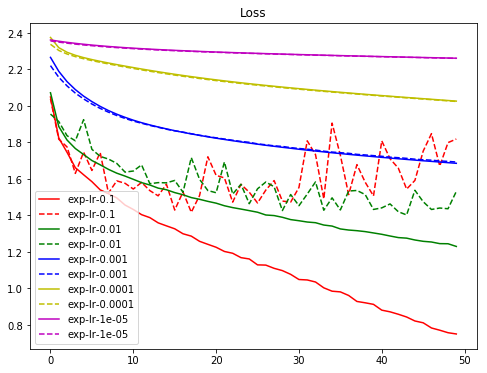

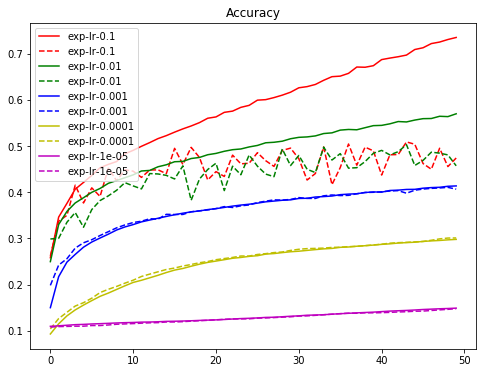

In [10]:
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_SGD.keys()):
    plt.plot(range(len(results_SGD[cond]['train-loss'])),results_SGD[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_SGD[cond]['valid-loss'])),results_SGD[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_SGD.keys()):
    plt.plot(range(len(results_SGD[cond]['train-acc'])),results_SGD[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_SGD[cond]['valid-acc'])),results_SGD[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [15]:
results_RMSprop = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results_RMSprop[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 6s 121us/step - loss: 2.3075 - accuracy: 0.0999 - val_loss: 2.3114 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.3083 - accuracy: 0.0988 - val_loss: 2.3147 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3083 - accuracy: 0.0988 - val_loss: 2.3184 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________________

50000/50000 [==============================] - 6s 124us/step - loss: 1.6806 - accuracy: 0.3990 - val_loss: 1.7930 - val_accuracy: 0.3581
Epoch 46/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.6727 - accuracy: 0.3984 - val_loss: 1.7357 - val_accuracy: 0.3902
Epoch 47/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.6785 - accuracy: 0.3980 - val_loss: 1.7991 - val_accuracy: 0.3695
Epoch 48/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.6751 - accuracy: 0.4010 - val_loss: 1.8027 - val_accuracy: 0.3601
Epoch 49/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.6745 - accuracy: 0.4001 - val_loss: 1.7720 - val_accuracy: 0.3631
Epoch 50/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.6708 - accuracy: 0.4034 - val_loss: 1.9721 - val_accuracy: 0.3370
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer

50000/50000 [==============================] - 6s 127us/step - loss: 0.8834 - accuracy: 0.6834 - val_loss: 1.7027 - val_accuracy: 0.4945
Epoch 43/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.8768 - accuracy: 0.6867 - val_loss: 1.8205 - val_accuracy: 0.4774
Epoch 44/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.8609 - accuracy: 0.6924 - val_loss: 1.7705 - val_accuracy: 0.4946
Epoch 45/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.8479 - accuracy: 0.6958 - val_loss: 1.8629 - val_accuracy: 0.4715
Epoch 46/50
50000/50000 [==============================] - 6s 127us/step - loss: 0.8351 - accuracy: 0.7013 - val_loss: 1.9666 - val_accuracy: 0.4814
Epoch 47/50
50000/50000 [==============================] - 6s 127us/step - loss: 0.8259 - accuracy: 0.7034 - val_loss: 1.8180 - val_accuracy: 0.4795
Epoch 48/50
50000/50000 [==============================] - 6s 127us/step - loss: 0.8138 - accuracy: 0.7072 - val_loss:

50000/50000 [==============================] - 6s 126us/step - loss: 1.0515 - accuracy: 0.6330 - val_loss: 1.5366 - val_accuracy: 0.4694
Epoch 40/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.0421 - accuracy: 0.6352 - val_loss: 1.4290 - val_accuracy: 0.5001
Epoch 41/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.0290 - accuracy: 0.6409 - val_loss: 1.5905 - val_accuracy: 0.4649
Epoch 42/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.0214 - accuracy: 0.6430 - val_loss: 1.3724 - val_accuracy: 0.5242
Epoch 43/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.0089 - accuracy: 0.6505 - val_loss: 1.5048 - val_accuracy: 0.4805
Epoch 44/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.0020 - accuracy: 0.6514 - val_loss: 1.3619 - val_accuracy: 0.5259
Epoch 45/50
50000/50000 [==============================] - 6s 128us/step - loss: 0.9870 - accuracy: 0.6564 - val_loss:

Epoch 37/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.4612 - accuracy: 0.4946 - val_loss: 1.5120 - val_accuracy: 0.4697
Epoch 38/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.4558 - accuracy: 0.4966 - val_loss: 1.5194 - val_accuracy: 0.4693
Epoch 39/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.4510 - accuracy: 0.4947 - val_loss: 1.5055 - val_accuracy: 0.4745
Epoch 40/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.4458 - accuracy: 0.5003 - val_loss: 1.4955 - val_accuracy: 0.4739
Epoch 41/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.4412 - accuracy: 0.5025 - val_loss: 1.4930 - val_accuracy: 0.4777
Epoch 42/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.4361 - accuracy: 0.5025 - val_loss: 1.4849 - val_accuracy: 0.4783
Epoch 43/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.4311 - accuracy: 0.5030

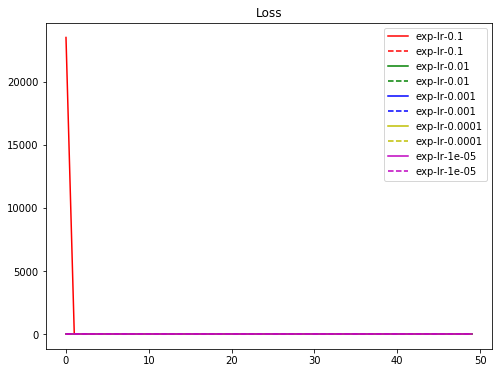

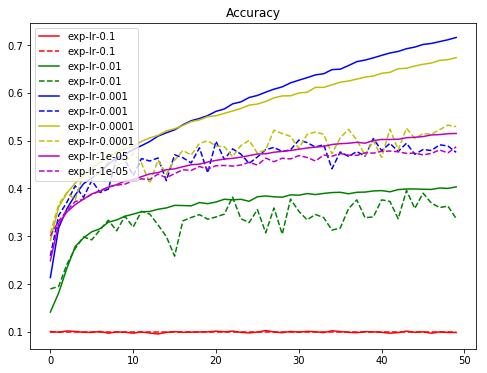

In [17]:
results = results_RMSprop
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [18]:
results_AdaGrad = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results_AdaGrad[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 6s 122us/step - loss: 1.4463 - accuracy: 0.4809 - val_loss: 1.5283 - val_accuracy: 0.4517
Epoch 49/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.4408 - accuracy: 0.4833 - val_loss: 1.5486 - val_accuracy: 0.4465
Epoch 50/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.4387 - accuracy: 0.4834 - val_loss: 1.5104 - val_accuracy: 0.4606
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________________

50000/50000 [==============================] - 6s 120us/step - loss: 1.0630 - accuracy: 0.6267 - val_loss: 1.3712 - val_accuracy: 0.5261
Epoch 46/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0611 - accuracy: 0.6275 - val_loss: 1.3780 - val_accuracy: 0.5222
Epoch 47/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.0527 - accuracy: 0.6296 - val_loss: 1.3546 - val_accuracy: 0.5306
Epoch 48/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.0448 - accuracy: 0.6338 - val_loss: 1.3578 - val_accuracy: 0.5268
Epoch 49/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.0404 - accuracy: 0.6374 - val_loss: 1.3869 - val_accuracy: 0.5239
Epoch 50/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.0300 - accuracy: 0.6376 - val_loss: 1.3796 - val_accuracy: 0.5240
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer

Epoch 43/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.2790 - accuracy: 0.5562 - val_loss: 1.3977 - val_accuracy: 0.5014
Epoch 44/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.2753 - accuracy: 0.5573 - val_loss: 1.3841 - val_accuracy: 0.5085
Epoch 45/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.2707 - accuracy: 0.5593 - val_loss: 1.3994 - val_accuracy: 0.5022
Epoch 46/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.2658 - accuracy: 0.5595 - val_loss: 1.3857 - val_accuracy: 0.5085
Epoch 47/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.2627 - accuracy: 0.5602 - val_loss: 1.3907 - val_accuracy: 0.5018
Epoch 48/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.2571 - accuracy: 0.5633 - val_loss: 1.3759 - val_accuracy: 0.5100
Epoch 49/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.2546 - accuracy: 0.5651

50000/50000 [==============================] - 6s 122us/step - loss: 1.6548 - accuracy: 0.4267 - val_loss: 1.6647 - val_accuracy: 0.4237
Epoch 41/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6527 - accuracy: 0.4272 - val_loss: 1.6630 - val_accuracy: 0.4224
Epoch 42/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6508 - accuracy: 0.4279 - val_loss: 1.6602 - val_accuracy: 0.4216
Epoch 43/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6487 - accuracy: 0.4283 - val_loss: 1.6591 - val_accuracy: 0.4222
Epoch 44/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.6468 - accuracy: 0.4292 - val_loss: 1.6569 - val_accuracy: 0.4228
Epoch 45/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.6450 - accuracy: 0.4300 - val_loss: 1.6550 - val_accuracy: 0.4253
Epoch 46/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.6430 - accuracy: 0.4307 - val_loss:

50000/50000 [==============================] - 6s 128us/step - loss: 2.0155 - accuracy: 0.2992 - val_loss: 2.0159 - val_accuracy: 0.2977
Epoch 38/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.0133 - accuracy: 0.3002 - val_loss: 2.0138 - val_accuracy: 0.2987
Epoch 39/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.0111 - accuracy: 0.3008 - val_loss: 2.0116 - val_accuracy: 0.3003
Epoch 40/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.0089 - accuracy: 0.3017 - val_loss: 2.0096 - val_accuracy: 0.3009
Epoch 41/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.0069 - accuracy: 0.3025 - val_loss: 2.0076 - val_accuracy: 0.3011
Epoch 42/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.0049 - accuracy: 0.3034 - val_loss: 2.0056 - val_accuracy: 0.3017
Epoch 43/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.0029 - accuracy: 0.3045 - val_loss:

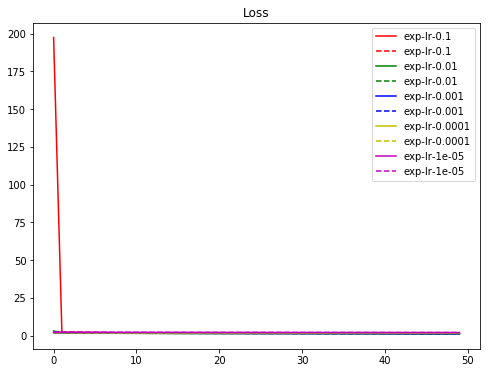

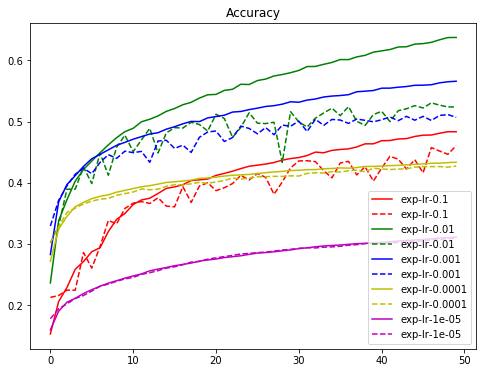

In [19]:
results = results_AdaGrad
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [20]:
results_Adam = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results_Adam[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 7s 145us/step - loss: 2.3065 - accuracy: 0.0987 - val_loss: 2.3052 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.3066 - accuracy: 0.0992 - val_loss: 2.3064 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.3080 - accuracy: 0.1012 - val_loss: 2.3101 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________________

Epoch 46/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4822 - accuracy: 0.4668 - val_loss: 1.5716 - val_accuracy: 0.4408
Epoch 47/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.4677 - accuracy: 0.4720 - val_loss: 1.6556 - val_accuracy: 0.4170
Epoch 48/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.4737 - accuracy: 0.4743 - val_loss: 1.5343 - val_accuracy: 0.4521
Epoch 49/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.4786 - accuracy: 0.4702 - val_loss: 1.5946 - val_accuracy: 0.4341
Epoch 50/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4751 - accuracy: 0.4711 - val_loss: 1.6020 - val_accuracy: 0.4322
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________

Epoch 44/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.7372 - accuracy: 0.7368 - val_loss: 1.6360 - val_accuracy: 0.5144
Epoch 45/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.7112 - accuracy: 0.7467 - val_loss: 1.6561 - val_accuracy: 0.5129
Epoch 46/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.6984 - accuracy: 0.7498 - val_loss: 1.6956 - val_accuracy: 0.5243
Epoch 47/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.6981 - accuracy: 0.7490 - val_loss: 1.7038 - val_accuracy: 0.5074
Epoch 48/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.6858 - accuracy: 0.7535 - val_loss: 1.7664 - val_accuracy: 0.5072
Epoch 49/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.6846 - accuracy: 0.7564 - val_loss: 1.7335 - val_accuracy: 0.5198
Epoch 50/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.6509 - accuracy: 0.7659

Epoch 42/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.8941 - accuracy: 0.6917 - val_loss: 1.3440 - val_accuracy: 0.5396
Epoch 43/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.8860 - accuracy: 0.6955 - val_loss: 1.3294 - val_accuracy: 0.5471
Epoch 44/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.8712 - accuracy: 0.7010 - val_loss: 1.3515 - val_accuracy: 0.5442
Epoch 45/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.8541 - accuracy: 0.7054 - val_loss: 1.4060 - val_accuracy: 0.5355
Epoch 46/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.8498 - accuracy: 0.7082 - val_loss: 1.3616 - val_accuracy: 0.5417
Epoch 47/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.8395 - accuracy: 0.7089 - val_loss: 1.3541 - val_accuracy: 0.5431
Epoch 48/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.8242 - accuracy: 0.7189

Epoch 40/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4151 - accuracy: 0.5088 - val_loss: 1.4648 - val_accuracy: 0.4827
Epoch 41/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.4096 - accuracy: 0.5118 - val_loss: 1.4637 - val_accuracy: 0.4849
Epoch 42/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4045 - accuracy: 0.5128 - val_loss: 1.4568 - val_accuracy: 0.4848
Epoch 43/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.3996 - accuracy: 0.5149 - val_loss: 1.4552 - val_accuracy: 0.4870
Epoch 44/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.3930 - accuracy: 0.5166 - val_loss: 1.4519 - val_accuracy: 0.4869
Epoch 45/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.3897 - accuracy: 0.5176 - val_loss: 1.4481 - val_accuracy: 0.4883
Epoch 46/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.3838 - accuracy: 0.5197

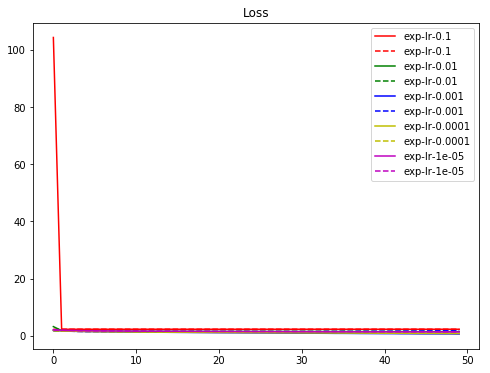

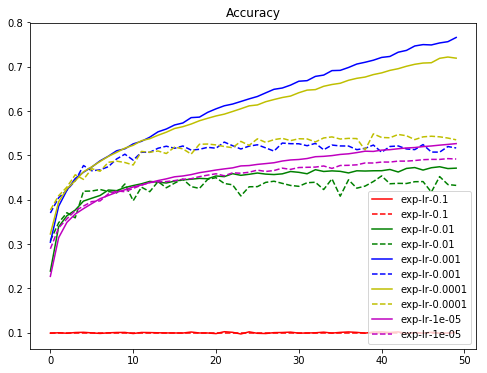

In [21]:
results = results_Adam
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()